In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from keras import regularizers

In [3]:
(train_img, train_label), (test_img, test_label) = cifar10.load_data()

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


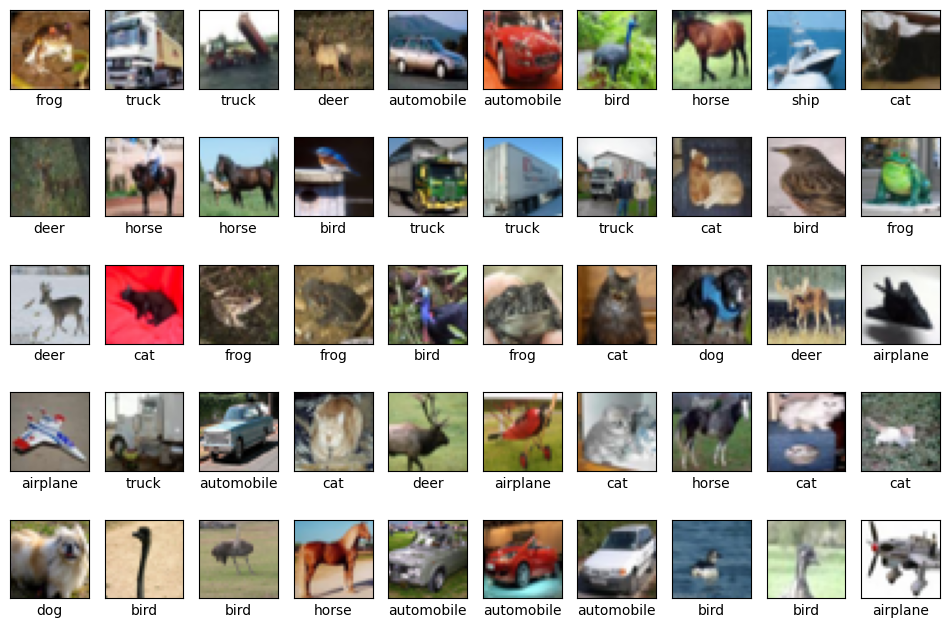

In [5]:
plt.figure(figsize=(12, 8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(train_img[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_label[i][0]])
plt.show()

In [6]:
model = keras.Sequential([

    keras.Input(shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),


    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='SAME', 
                        kernel_initializer='he_uniform', 
                       ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='SAME', 
                        kernel_initializer='he_uniform',
                       ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', padding='SAME', 
                        kernel_initializer='he_uniform',
                       ),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),

    keras.layers.Dense(164, activation='relu', kernel_initializer='he_uniform',
                       kernel_regularizer=regularizers.l2(0.01)
                      ),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),


    keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 32, 32, 3)         12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [8]:
import tensorflow as tf

epoch = 10
sgd_lr = 0.001
sgd_dcy = sgd_lr / epoch
optimizer_sgd = tf.keras.optimizers.legacy.SGD(learning_rate=sgd_lr, momentum=0.9, nesterov=True, decay=sgd_dcy)


In [9]:
model.compile(
    optimizer= optimizer_sgd, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
h1_sgd = model.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 125s 413ms/step - loss: 5.1190 - accuracy: 0.3871 - val_loss: 4.3206 - val_accuracy: 0.5295
Epoch 2/10
293/293 [==============================] - 122s 416ms/step - loss: 4.2344 - accuracy: 0.5218 - val_loss: 3.8444 - val_accuracy: 0.5909
Epoch 3/10
293/293 [==============================] - 127s 435ms/step - loss: 3.7663 - accuracy: 0.5768 - val_loss: 3.5122 - val_accuracy: 0.6137
Epoch 4/10
293/293 [==============================] - 121s 414ms/step - loss: 3.3946 - accuracy: 0.6145 - val_loss: 3.2266 - val_accuracy: 0.6347
Epoch 5/10
293/293 [==============================] - 120s 411ms/step - loss: 3.0959 - accuracy: 0.6434 - val_loss: 2.9846 - val_accuracy: 0.6510
Epoch 6/10
293/293 [==============================] - 120s 409ms/step - loss: 2.8348 - accuracy: 0.6701 - val_loss: 2.7822 - val_accuracy: 0.6558
Epoch 7/10
293/293 [==============================] - 120s 411ms/step - loss: 2.6235 - accuracy: 0.6842 - val_loss: 2.6071 -

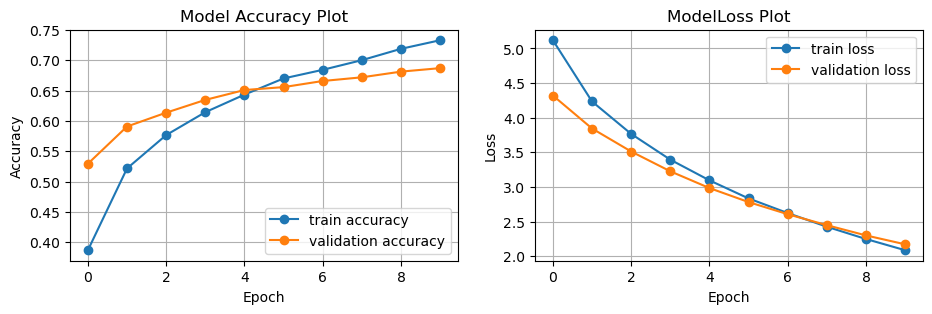

In [14]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,3)
plt.title("Model Accuracy Plot")
plt.plot(h1_sgd.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_sgd.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,4)
plt.title("ModelLoss Plot")
plt.plot(h1_sgd.history['loss'], 'o-', label='train loss')
plt.plot(h1_sgd.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [16]:
test_loss_sgd1, test_acc_sgd1 = model.evaluate(test_img, test_label)
print("\nMODEL TEST ACCURACY WITH SGD")
print('\nTest Accuracy:', test_acc_sgd1)
print('Test Loss:', test_loss_sgd1)

313/313 [==============================] - 4s 14ms/step - loss: 2.1784 - accuracy: 0.6856

MODEL TEST ACCURACY WITH SGD

Test Accuracy: 0.6855999827384949
Test Loss: 2.178375482559204


In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.001,
    decay_steps=10000,
    decay_rate=0.99)
epoch = 10
rmsp_lr = lr_schedule
optimizer_rmsp = keras.optimizers.RMSprop(learning_rate = rmsp_lr)

In [18]:
model.compile(
    optimizer= optimizer_rmsp, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [19]:
h1_rmsp = model.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 135s 445ms/step - loss: 2.4707 - accuracy: 0.5744 - val_loss: 2.0924 - val_accuracy: 0.6108
Epoch 2/10
293/293 [==============================] - 125s 427ms/step - loss: 2.0021 - accuracy: 0.6252 - val_loss: 1.8912 - val_accuracy: 0.6493
Epoch 3/10
293/293 [==============================] - 138s 472ms/step - loss: 1.8955 - accuracy: 0.6574 - val_loss: 1.8232 - val_accuracy: 0.6727
Epoch 4/10
293/293 [==============================] - 140s 477ms/step - loss: 1.8716 - accuracy: 0.6759 - val_loss: 1.8529 - val_accuracy: 0.6921
Epoch 5/10
293/293 [==============================] - 139s 475ms/step - loss: 1.8479 - accuracy: 0.6921 - val_loss: 1.8326 - val_accuracy: 0.6892
Epoch 6/10
293/293 [==============================] - 141s 480ms/step - loss: 1.8132 - accuracy: 0.7095 - val_loss: 1.7974 - val_accuracy: 0.7183
Epoch 7/10
293/293 [==============================] - 126s 429ms/step - loss: 1.7932 - accuracy: 0.7194 - val_loss: 1.7953 -

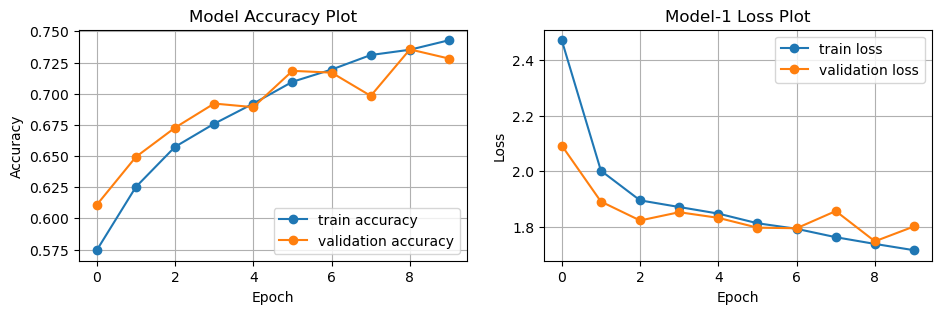

In [20]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,1)
plt.title("Model Accuracy Plot")
plt.plot(h1_rmsp.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_rmsp.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,2)
plt.title("Model-1 Loss Plot")
plt.plot(h1_rmsp.history['loss'], 'o-', label='train loss')
plt.plot(h1_rmsp.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [22]:
test_loss_rmsp1, test_acc_rmsp1 = model.evaluate(test_img, test_label)
print("MODEL TEST ACCURACY WITH RMSprop")
print('\nTest Accuracy:', test_acc_rmsp1)
print('Test Loss:', test_loss_rmsp1)

313/313 [==============================] - 8s 25ms/step - loss: 1.8311 - accuracy: 0.7167
MODEL TEST ACCURACY WITH RMSprop

Test Accuracy: 0.71670001745224
Test Loss: 1.8310835361480713


In [23]:
adam_lr = 0.0001
beta1 = 0.99
beta2 = 0.9999
eps = 1e-9

optimizer_adam = keras.optimizers.Adam(learning_rate=adam_lr, beta_1=beta1, beta_2=beta2, epsilon=eps)

In [24]:
model.compile(
    optimizer= optimizer_adam, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [26]:
h1_adam = model.fit(x=train_img, y=train_label, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 147s 477ms/step - loss: 1.2389 - accuracy: 0.8091 - val_loss: 1.1023 - val_accuracy: 0.7873
Epoch 2/10
293/293 [==============================] - 142s 486ms/step - loss: 0.8363 - accuracy: 0.8555 - val_loss: 0.9414 - val_accuracy: 0.7945
Epoch 3/10
293/293 [==============================] - 143s 488ms/step - loss: 0.6849 - accuracy: 0.8790 - val_loss: 0.9203 - val_accuracy: 0.7922
Epoch 4/10
293/293 [==============================] - 143s 488ms/step - loss: 0.6277 - accuracy: 0.8984 - val_loss: 0.9653 - val_accuracy: 0.7868
Epoch 5/10
293/293 [==============================] - 142s 483ms/step - loss: 0.6104 - accuracy: 0.9058 - val_loss: 0.9565 - val_accuracy: 0.7942
Epoch 6/10
293/293 [==============================] - 140s 479ms/step - loss: 0.6061 - accuracy: 0.9123 - val_loss: 0.9705 - val_accuracy: 0.7947
Epoch 7/10
293/293 [==============================] - 141s 480ms/step - loss: 0.6001 - accuracy: 0.9167 - val_loss: 1.0108 -

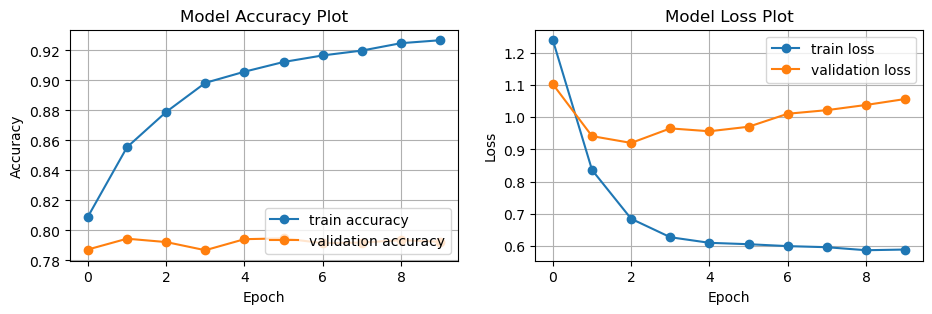

In [28]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,1)
plt.title("Model Accuracy Plot")
plt.plot(h1_adam.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_adam.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,2)
plt.title("Model Loss Plot")
plt.plot(h1_adam.history['loss'], 'o-', label='train loss')
plt.plot(h1_adam.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [30]:
test_loss_adam1, test_acc_adam1 = model.evaluate(test_img, test_label)
print("MODEL TEST ACCURACY WITH ADAM")
print('\nTest Accuracy:', test_acc_adam1)
print('Test Loss:', test_loss_adam1)

313/313 [==============================] - 4s 14ms/step - loss: 1.0654 - accuracy: 0.7843
MODEL TEST ACCURACY WITH ADAM

Test Accuracy: 0.7843000292778015
Test Loss: 1.0654267072677612


In [31]:
model_names = ['Model']
model_histories = ['h1']
optimizers = ['sgd', 'rmsp', 'adam']

max_accuracy_values = {optimizer: [] for optimizer in optimizers}
min_loss_values = {optimizer: [] for optimizer in optimizers}

for model_history in model_histories:
    for optimizer in optimizers:
        variable_name = f"{model_history.lower()}_{optimizer.lower()}"
        history = locals()[variable_name]
        max_accuracy_values[optimizer].append(max(history.history["accuracy"]))
        min_loss_values[optimizer].append(min(history.history["loss"]))

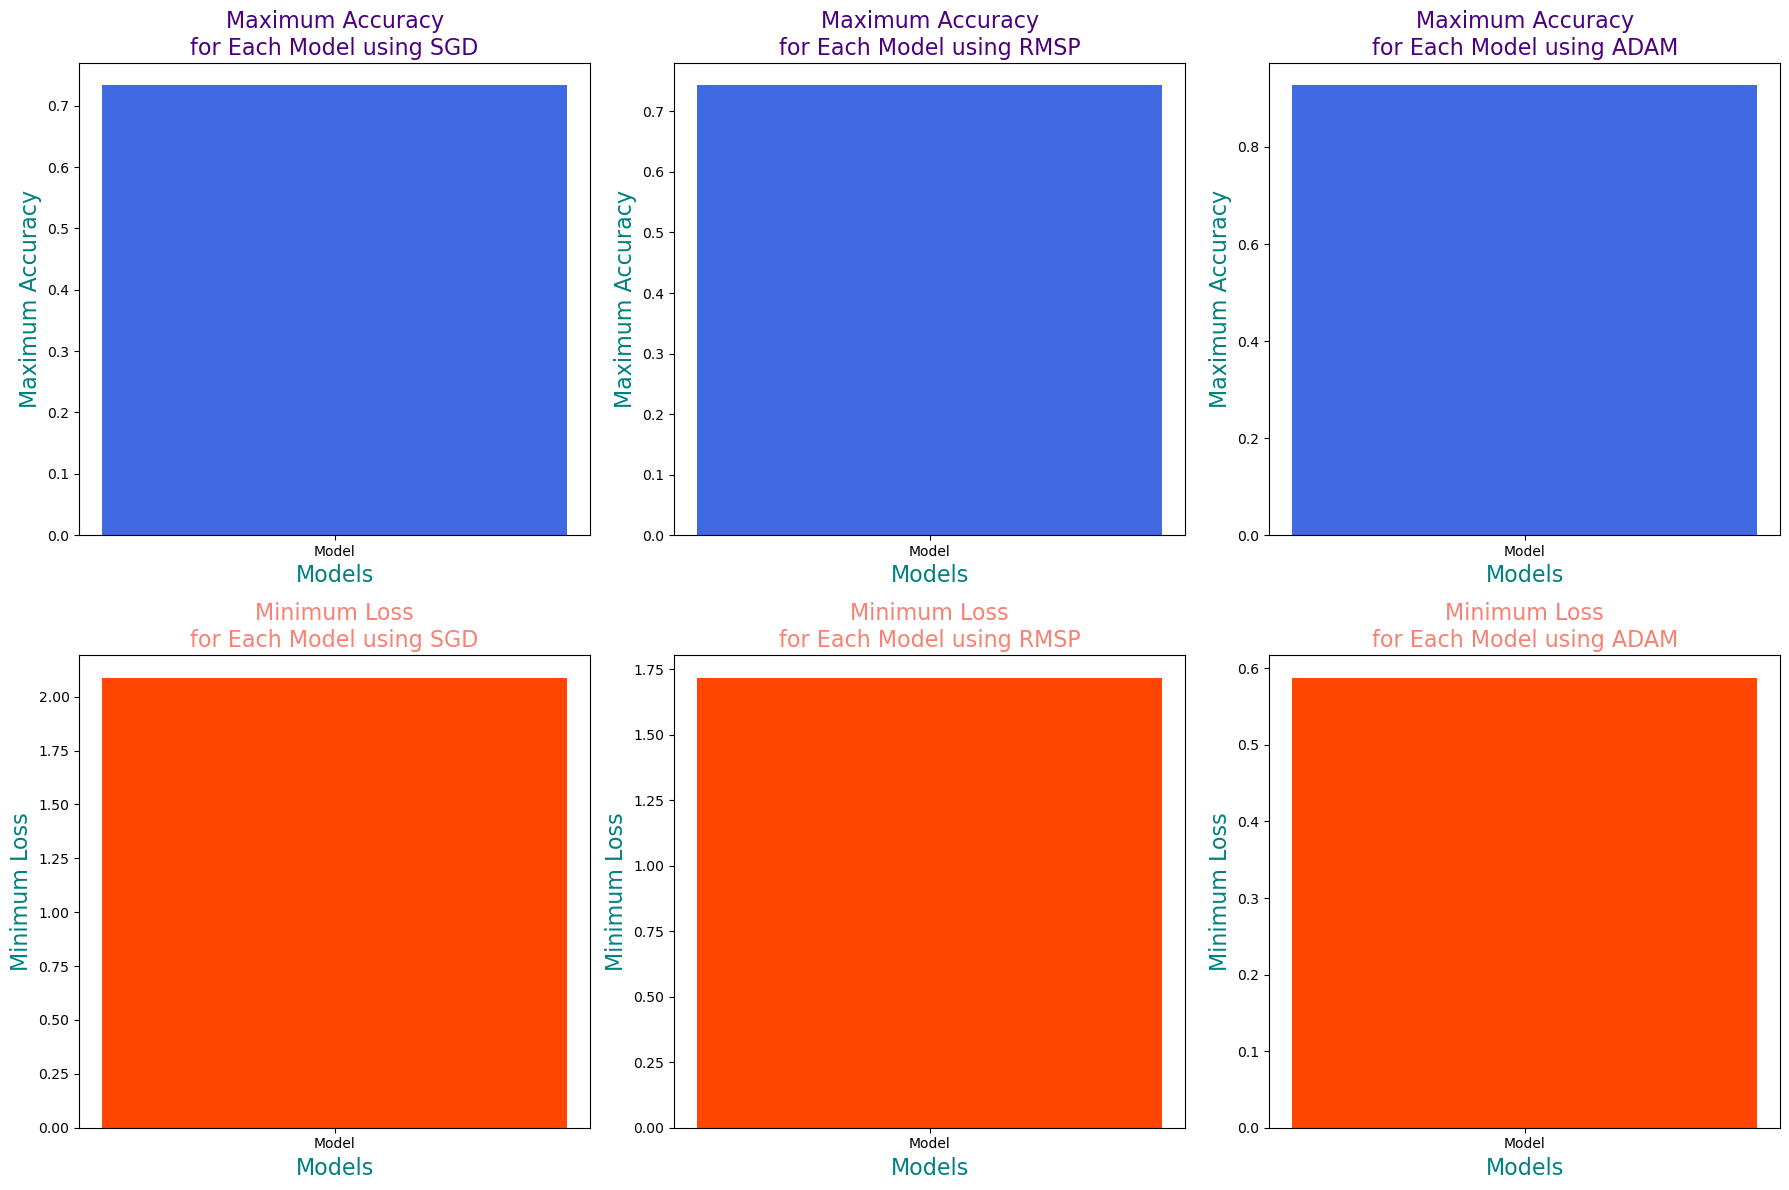

In [32]:

max_acc_indices = {optimizer: max_accuracy_values[optimizer].index(max(max_accuracy_values[optimizer])) for optimizer in optimizers}
min_loss_indices = {optimizer: min_loss_values[optimizer].index(min(min_loss_values[optimizer])) for optimizer in optimizers}


fig, axs = plt.subplots(2, len(optimizers), figsize=(18, 12))


for i, optimizer in enumerate(optimizers):
    axs[0, i].bar(model_names, max_accuracy_values[optimizer], color='cornflowerblue', label=optimizer)
    axs[0, i].bar(max_acc_indices[optimizer], max_accuracy_values[optimizer][max_acc_indices[optimizer]], color='royalblue')
    axs[0, i].set_xlabel('Models', size=16, color='teal')
    axs[0, i].set_ylabel('Maximum Accuracy', size=16, color='teal')
    axs[0, i].set_title(f'Maximum Accuracy\nfor Each Model using {optimizer.upper()}', size=16, color='indigo')


for i, optimizer in enumerate(optimizers):
    axs[1, i].bar(model_names, min_loss_values[optimizer], color='coral', label=optimizer)
    axs[1, i].bar(min_loss_indices[optimizer], min_loss_values[optimizer][min_loss_indices[optimizer]], color='orangered')
    axs[1, i].set_xlabel('Models', size=16, color='teal')
    axs[1, i].set_ylabel('Minimum Loss', size=16, color='teal')
    axs[1, i].set_title(f'Minimum Loss\nfor Each Model using {optimizer.upper()}', size=16, color='salmon')

plt.tight_layout()
plt.show()

Model 1
313/313 [==============================] - 4s 13ms/step


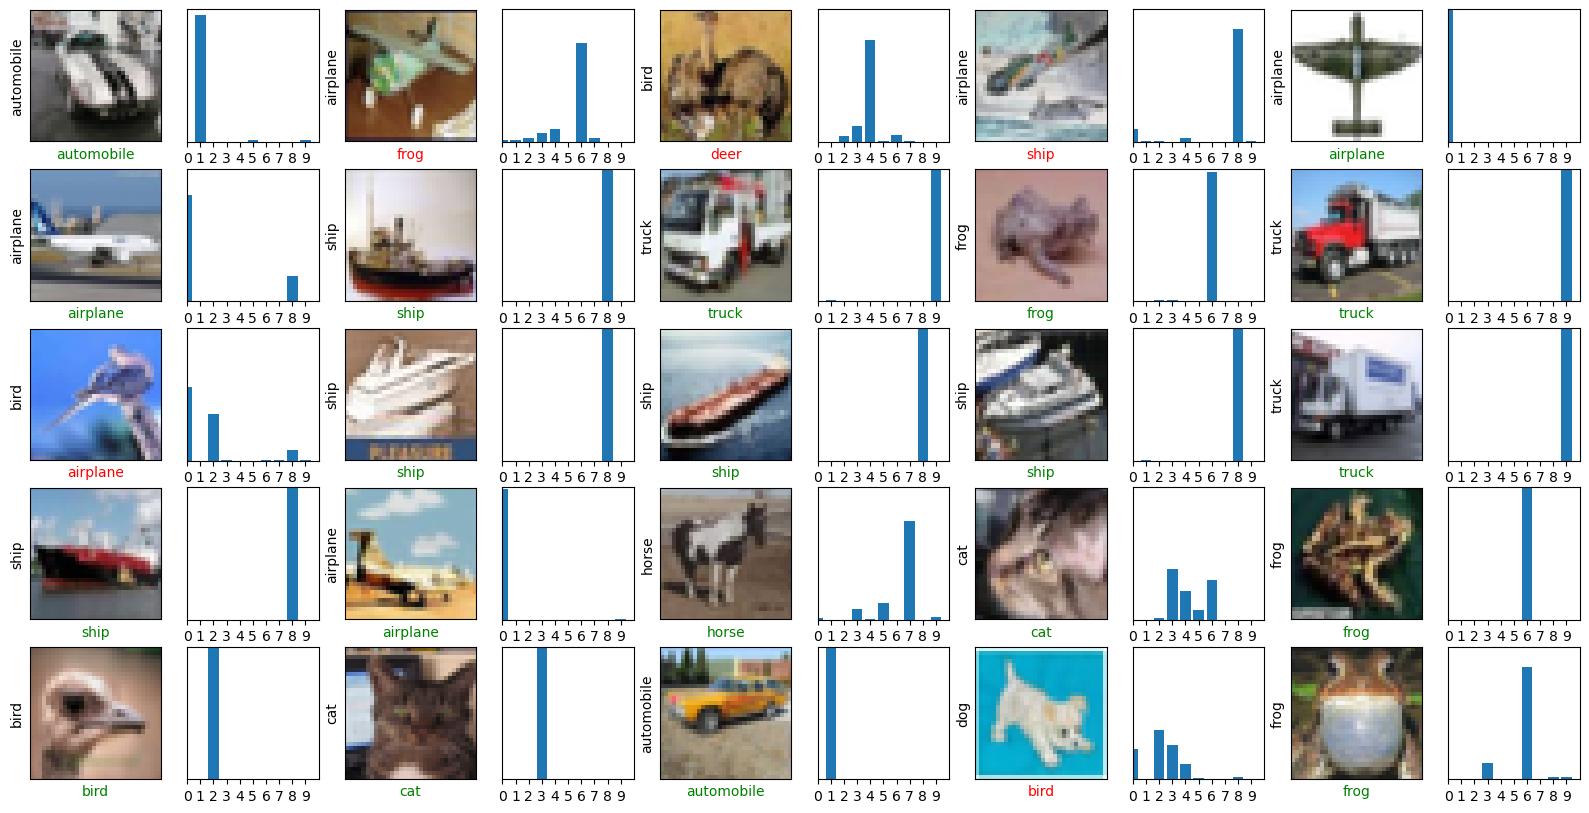

In [34]:
import random

models = [model]

for i, model in enumerate(models, start=1):
    print(f"Model {i}")
    test_loss, test_acc = model.evaluate(test_img, test_label)
    predictions = model.predict(test_img)

    random_indices = random.sample(range(len(test_img)), 25)

    rows = 5
    cols = 5

    plt.figure(figsize=(20, 10))
    for j, index in enumerate(random_indices):
        plt.subplot(rows, 2 * cols, 2 * j + 1)
        plt.imshow(test_img[index])
        plt.xticks([])
        plt.yticks([])
        plt.ylabel(class_names[test_label[index][0]])
        if test_label[index][0] == np.argmax(predictions[index]):
            plt.xlabel(class_names[np.argmax(predictions[index])], color='g')
        else:
            plt.xlabel(class_names[np.argmax(predictions[index])], color='r')

        plt.subplot(rows, 2 * cols, 2 * j + 2)
        plt.bar(range(10), predictions[index])
        plt.yticks([])
        plt.xticks(range(0, 10))
        plt.ylim([0, 1])
        plt.xlim([0, 10])

    plt.show()